# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [ ]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('/content/BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [ ]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [ ]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [ ]:
# H0 (answer in words):

There is no relationship between levels of masculinity in male characters and the success of fanfiction stories,
when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


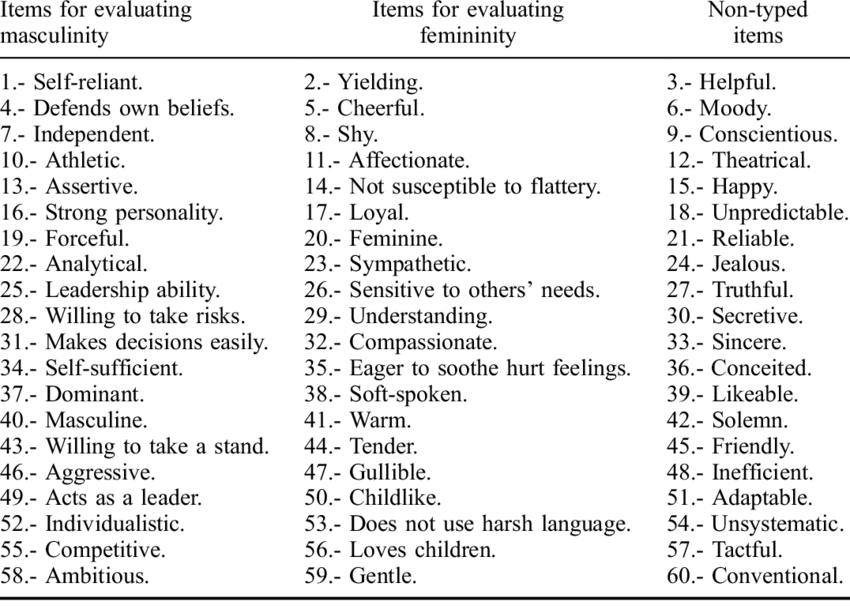

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [ ]:
# Import the drive module from google.colab and mount Google Drive to /content/gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Specify a location in Google Drive where the output of this notebook will be saved
colab_directory_path = '/content/gdrive/MyDrive/AD_A2_resit'

In [ ]:
# Go inside this folder
%cd /content/gdrive/MyDrive/AD_A2_resit

/content/gdrive/MyDrive/AD_A2_resit


In [ ]:
# Download the Riveter code and data from its GitHub repository by cloning it
!git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [ ]:
# Check the download
%ls

AD_Assignment2_resit.ipynb  BTS_short_100.csv  riveter-nlp/


In [ ]:
# Move inside the Riveter folder
%cd /content/gdrive/MyDrive/AD_A2_resit/riveter-nlp/riveter

/content/gdrive/MyDrive/AD_A2_resit/riveter-nlp/riveter


In [ ]:
# Install necessary spaCy models and additional Python packages to support Riveter
!pip install -U spacy-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
# Install spaCy experimental release (v0.6), around 500MB in size
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 23.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using

In [ ]:
# Download spacy
!python -m spacy download en_core_web_sm

2024-05-16 15:16:13.971209: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 15:16:13.971277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 15:16:13.974246: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-16 15:16:13.991241: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 15:16:17.178904: W tensorflow/compiler/tf2

In [ ]:
# Install seaborn
!pip install seaborn

Now we have prepared all the dependencies needed.

In [ ]:
# Import necessary libraries
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [ ]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [ ]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
riveter = Riveter()
riveter.load_sap_lexicon('power')

scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [ ]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter.train(segments,
             text_ids,
             num_bootstraps=10,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:36<54:14, 36.57s/it]

2024-05-16 15:21:16 Complete!
Story ID: 4706144, Masculine Power Score: 0.08939663599285402



Processing stories:   2%|▏         | 2/90 [01:06<48:06, 32.80s/it]

2024-05-16 15:21:46 Complete!
Story ID: 4752980, Masculine Power Score: 0.19246325388280502



Processing stories:   3%|▎         | 3/90 [01:34<44:15, 30.52s/it]

2024-05-16 15:22:14 Complete!
Story ID: 4621698, Masculine Power Score: 0.6171428571428571



Processing stories:   4%|▍         | 4/90 [02:05<43:50, 30.58s/it]

2024-05-16 15:22:45 Complete!
Story ID: 3651108, Masculine Power Score: 0.13932173538311643



Processing stories:   6%|▌         | 5/90 [02:37<44:05, 31.13s/it]

2024-05-16 15:23:17 Complete!
Story ID: 5282729, Masculine Power Score: 0.21241935483870966



Processing stories:   7%|▋         | 6/90 [03:08<43:22, 30.98s/it]

2024-05-16 15:23:47 Complete!
Story ID: 5533886, Masculine Power Score: 0.016415343915343918



Processing stories:   8%|▊         | 7/90 [03:48<46:57, 33.94s/it]

2024-05-16 15:24:28 Complete!
Story ID: 4547622, Masculine Power Score: 0.03590989564291277



Processing stories:   9%|▉         | 8/90 [04:16<43:59, 32.19s/it]

2024-05-16 15:24:56 Complete!
Story ID: 16177508, Masculine Power Score: 0.15542637330455608



Processing stories:  10%|█         | 9/90 [04:47<42:53, 31.77s/it]

2024-05-16 15:25:27 Complete!
Story ID: 15745185, Masculine Power Score: -0.12445438023389907



 33%|███▎      | 1/3 [00:14<00:29, 14.95s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [05:17<41:47, 31.34s/it]

2024-05-16 15:25:57 Complete!
Story ID: 15654528, Masculine Power Score: 0.19105070355563064



Processing stories:  12%|█▏        | 11/90 [05:46<40:14, 30.57s/it]

2024-05-16 15:26:26 Complete!
Story ID: 7448155, Masculine Power Score: 0.33911568923963237



Processing stories:  13%|█▎        | 12/90 [06:18<40:15, 30.96s/it]

2024-05-16 15:26:58 Complete!
Story ID: 4983847, Masculine Power Score: 0.11530951124492408



Processing stories:  14%|█▍        | 13/90 [06:49<39:42, 30.95s/it]

2024-05-16 15:27:29 Complete!
Story ID: 3313118, Masculine Power Score: -0.16498706004140787



Processing stories:  16%|█▌        | 14/90 [07:19<39:04, 30.84s/it]

2024-05-16 15:27:59 Complete!
Story ID: 3290390, Masculine Power Score: -0.11215571662380172



Processing stories:  17%|█▋        | 15/90 [07:55<40:19, 32.26s/it]

2024-05-16 15:28:35 Complete!
Story ID: 36435301, Masculine Power Score: 0.05841483473062421



Processing stories:  18%|█▊        | 16/90 [08:24<38:33, 31.27s/it]

2024-05-16 15:29:04 Complete!
Story ID: 36575491, Masculine Power Score: 0.25839040636123073



Processing stories:  19%|█▉        | 17/90 [08:53<37:23, 30.73s/it]

2024-05-16 15:29:33 Complete!
Story ID: 35225224, Masculine Power Score: 0.24534918550263823



Processing stories:  20%|██        | 18/90 [09:24<36:50, 30.70s/it]

2024-05-16 15:30:04 Complete!
Story ID: 4594527, Masculine Power Score: 0.20863247863247864



Processing stories:  21%|██        | 19/90 [09:52<35:24, 29.92s/it]

2024-05-16 15:30:32 Complete!
Story ID: 5485625, Masculine Power Score: 0.10909090909090909



Processing stories:  22%|██▏       | 20/90 [10:21<34:37, 29.68s/it]

2024-05-16 15:31:01 Complete!
Story ID: 36408319, Masculine Power Score: 0.10149294805641555



Processing stories:  23%|██▎       | 21/90 [10:55<35:40, 31.03s/it]

2024-05-16 15:31:35 Complete!
Story ID: 35762659, Masculine Power Score: 0.21172840436093238



Processing stories:  24%|██▍       | 22/90 [11:27<35:27, 31.29s/it]

2024-05-16 15:32:07 Complete!
Story ID: 35603194, Masculine Power Score: 0.3586327888687235



Processing stories:  26%|██▌       | 23/90 [11:58<34:53, 31.25s/it]

2024-05-16 15:32:38 Complete!
Story ID: 35344306, Masculine Power Score: 0.11184085867751929



Processing stories:  27%|██▋       | 24/90 [12:25<32:56, 29.94s/it]

2024-05-16 15:33:05 Complete!
Story ID: 36695155, Masculine Power Score: 0.1



Processing stories:  28%|██▊       | 25/90 [12:56<32:44, 30.23s/it]

2024-05-16 15:33:36 Complete!
Story ID: 36064474, Masculine Power Score: 0.13614995547332293



Processing stories:  29%|██▉       | 26/90 [13:29<33:12, 31.13s/it]

2024-05-16 15:34:09 Complete!
Story ID: 36024820, Masculine Power Score: 0.17004967285739078



Processing stories:  30%|███       | 27/90 [14:13<36:42, 34.96s/it]

2024-05-16 15:34:53 Complete!
Story ID: 35182330, Masculine Power Score: 0.07047502527720313



Processing stories:  31%|███       | 28/90 [14:47<35:40, 34.53s/it]

2024-05-16 15:35:27 Complete!
Story ID: 36567496, Masculine Power Score: 0.20622036374358355



Processing stories:  32%|███▏      | 29/90 [15:18<34:03, 33.51s/it]

2024-05-16 15:35:58 Complete!
Story ID: 35560330, Masculine Power Score: 0.12347160898257607



Processing stories:  33%|███▎      | 30/90 [15:51<33:27, 33.46s/it]

2024-05-16 15:36:31 Complete!
Story ID: 35877496, Masculine Power Score: 0.0818537666570182



Processing stories:  34%|███▍      | 31/90 [16:23<32:12, 32.76s/it]

2024-05-16 15:37:02 Complete!
Story ID: 35957410, Masculine Power Score: 0.2871988036873272



Processing stories:  36%|███▌      | 32/90 [16:53<30:56, 32.00s/it]

2024-05-16 15:37:33 Complete!
Story ID: 30947654, Masculine Power Score: -0.002234335839598994



Processing stories:  37%|███▋      | 33/90 [17:24<30:16, 31.88s/it]

2024-05-16 15:38:04 Complete!
Story ID: 36332707, Masculine Power Score: -0.10542594265998521



Processing stories:  38%|███▊      | 34/90 [17:58<30:15, 32.42s/it]

2024-05-16 15:38:38 Complete!
Story ID: 35967940, Masculine Power Score: 0.15936047820954866



Processing stories:  39%|███▉      | 35/90 [18:30<29:42, 32.41s/it]

2024-05-16 15:39:10 Complete!
Story ID: 35001073, Masculine Power Score: 0.06126984126984127



Processing stories:  40%|████      | 36/90 [19:04<29:32, 32.83s/it]

2024-05-16 15:39:44 Complete!
Story ID: 35138911, Masculine Power Score: 0.1265406810861434



Processing stories:  41%|████      | 37/90 [19:33<27:53, 31.57s/it]

2024-05-16 15:40:13 Complete!
Story ID: 35280397, Masculine Power Score: 0.3597703349282297



Processing stories:  42%|████▏     | 38/90 [20:08<28:14, 32.59s/it]

2024-05-16 15:40:48 Complete!
Story ID: 36049939, Masculine Power Score: 0.3239942551483766



Processing stories:  43%|████▎     | 39/90 [20:44<28:32, 33.59s/it]

2024-05-16 15:41:24 Complete!
Story ID: 34995673, Masculine Power Score: 0.12139367051168293



Processing stories:  44%|████▍     | 40/90 [21:20<28:34, 34.29s/it]

2024-05-16 15:42:00 Complete!
Story ID: 33477346, Masculine Power Score: 0.4342633347045112



Processing stories:  46%|████▌     | 41/90 [21:49<26:41, 32.68s/it]

2024-05-16 15:42:29 Complete!
Story ID: 36840832, Masculine Power Score: -0.22212857318120474



Processing stories:  47%|████▋     | 42/90 [22:16<24:53, 31.11s/it]

2024-05-16 15:42:56 Complete!
Story ID: 30896276, Masculine Power Score: -0.019047619047619042



Processing stories:  48%|████▊     | 43/90 [22:43<23:18, 29.76s/it]

2024-05-16 15:43:23 Complete!
Story ID: 37363471, Masculine Power Score: 0.42783549783549785



Processing stories:  49%|████▉     | 44/90 [23:12<22:43, 29.63s/it]

2024-05-16 15:43:52 Complete!
Story ID: 36984901, Masculine Power Score: 0.4313725490196078



Processing stories:  50%|█████     | 45/90 [23:42<22:16, 29.69s/it]

2024-05-16 15:44:22 Complete!
Story ID: 33353644, Masculine Power Score: -0.06353109339790805



Processing stories:  51%|█████     | 46/90 [24:18<23:08, 31.56s/it]

2024-05-16 15:44:58 Complete!
Story ID: 37002835, Masculine Power Score: -0.14448107448107447



Processing stories:  52%|█████▏    | 47/90 [24:46<22:00, 30.72s/it]

2024-05-16 15:45:26 Complete!
Story ID: 5630824, Masculine Power Score: 0.33157894736842103



Processing stories:  53%|█████▎    | 48/90 [25:18<21:46, 31.10s/it]

2024-05-16 15:45:58 Complete!
Story ID: 10053617, Masculine Power Score: 0.18510132340777502



Processing stories:  54%|█████▍    | 49/90 [25:48<21:00, 30.75s/it]

2024-05-16 15:46:28 Complete!
Story ID: 1572659, Masculine Power Score: 0.2255525846702317



Processing stories:  56%|█████▌    | 50/90 [26:20<20:42, 31.07s/it]

2024-05-16 15:47:00 Complete!
Story ID: 7450573, Masculine Power Score: 0.29434065934065934



Processing stories:  57%|█████▋    | 51/90 [26:52<20:23, 31.37s/it]

2024-05-16 15:47:32 Complete!
Story ID: 6918676, Masculine Power Score: 0.03186100072986781



Processing stories:  58%|█████▊    | 52/90 [27:28<20:39, 32.63s/it]

2024-05-16 15:48:08 Complete!
Story ID: 6075402, Masculine Power Score: 0.3623984960886204



Processing stories:  59%|█████▉    | 53/90 [28:01<20:17, 32.91s/it]

2024-05-16 15:48:41 Complete!
Story ID: 11101779, Masculine Power Score: 0.3653479853479854



Processing stories:  60%|██████    | 54/90 [28:36<20:01, 33.36s/it]

2024-05-16 15:49:16 Complete!
Story ID: 11321331, Masculine Power Score: 0.06759847774629027



Processing stories:  61%|██████    | 55/90 [29:05<18:47, 32.23s/it]

2024-05-16 15:49:45 Complete!
Story ID: 12284853, Masculine Power Score: 0.04405921179322714



Processing stories:  62%|██████▏   | 56/90 [29:36<17:54, 31.61s/it]

2024-05-16 15:50:16 Complete!
Story ID: 12282003, Masculine Power Score: 0.11121345029239767



Processing stories:  63%|██████▎   | 57/90 [30:04<16:54, 30.76s/it]

2024-05-16 15:50:44 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [30:33<16:02, 30.08s/it]

2024-05-16 15:51:13 Complete!
Story ID: 4228053, Masculine Power Score: 0.21595902977663312



Processing stories:  66%|██████▌   | 59/90 [31:05<15:56, 30.85s/it]

2024-05-16 15:51:45 Complete!
Story ID: 12127317, Masculine Power Score: 0.12715177583598639



Processing stories:  67%|██████▋   | 60/90 [31:31<14:39, 29.31s/it]

2024-05-16 15:52:11 Complete!
Story ID: 12010134, Masculine Power Score: 0.22353937622479822



Processing stories:  68%|██████▊   | 61/90 [32:05<14:50, 30.72s/it]

2024-05-16 15:52:45 Complete!
Story ID: 11510919, Masculine Power Score: 0.5090028039306478



Processing stories:  69%|██████▉   | 62/90 [32:37<14:27, 30.98s/it]

2024-05-16 15:53:17 Complete!
Story ID: 8145802, Masculine Power Score: 0.2564549396808055



Processing stories:  70%|███████   | 63/90 [33:07<13:46, 30.62s/it]

2024-05-16 15:53:47 Complete!
Story ID: 6637942, Masculine Power Score: -0.07765657349896479



Processing stories:  71%|███████   | 64/90 [33:36<13:08, 30.32s/it]

2024-05-16 15:54:16 Complete!
Story ID: 7427905, Masculine Power Score: -0.0273891538597421



Processing stories:  72%|███████▏  | 65/90 [34:06<12:35, 30.21s/it]

2024-05-16 15:54:46 Complete!
Story ID: 3893857, Masculine Power Score: 0.12678251769899593



Processing stories:  73%|███████▎  | 66/90 [34:38<12:13, 30.55s/it]

2024-05-16 15:55:17 Complete!
Story ID: 33040258, Masculine Power Score: 0.18015873015873013



Processing stories:  74%|███████▍  | 67/90 [35:10<11:56, 31.16s/it]

2024-05-16 15:55:50 Complete!
Story ID: 33858850, Masculine Power Score: -0.1474864024864025



Processing stories:  76%|███████▌  | 68/90 [35:43<11:35, 31.60s/it]

2024-05-16 15:56:23 Complete!
Story ID: 2775776, Masculine Power Score: 0.26378510378510384



Processing stories:  77%|███████▋  | 69/90 [36:14<11:03, 31.59s/it]

2024-05-16 15:56:54 Complete!
Story ID: 3197963, Masculine Power Score: 0.25752136752136756



Processing stories:  78%|███████▊  | 70/90 [36:46<10:32, 31.61s/it]

2024-05-16 15:57:26 Complete!
Story ID: 12395199, Masculine Power Score: 0.1637513715681111



Processing stories:  79%|███████▉  | 71/90 [37:15<09:43, 30.72s/it]

2024-05-16 15:57:55 Complete!
Story ID: 10934010, Masculine Power Score: 0.2673280423280423



Processing stories:  80%|████████  | 72/90 [37:43<08:59, 29.99s/it]

2024-05-16 15:58:23 Complete!
Story ID: 12301116, Masculine Power Score: 0.0508983666061706



Processing stories:  81%|████████  | 73/90 [38:13<08:31, 30.10s/it]

2024-05-16 15:58:53 Complete!
Story ID: 12706317, Masculine Power Score: -0.03553610703812317



Processing stories:  82%|████████▏ | 74/90 [38:46<08:15, 30.98s/it]

2024-05-16 15:59:26 Complete!
Story ID: 11499468, Masculine Power Score: 0.0114685960591133



Processing stories:  83%|████████▎ | 75/90 [39:14<07:32, 30.15s/it]

2024-05-16 15:59:54 Complete!
Story ID: 12184146, Masculine Power Score: 0.3188575470935403



Processing stories:  84%|████████▍ | 76/90 [39:43<06:53, 29.56s/it]

2024-05-16 16:00:23 Complete!
Story ID: 12201333, Masculine Power Score: 0.11296886446886445



Processing stories:  86%|████████▌ | 77/90 [40:18<06:45, 31.20s/it]

2024-05-16 16:00:58 Complete!
Story ID: 11496030, Masculine Power Score: -0.13616103552115028



Processing stories:  87%|████████▋ | 78/90 [40:51<06:20, 31.72s/it]

2024-05-16 16:01:31 Complete!
Story ID: 11510277, Masculine Power Score: 0.15032841341454098



Processing stories:  88%|████████▊ | 79/90 [41:24<05:55, 32.36s/it]

2024-05-16 16:02:04 Complete!
Story ID: 10772274, Masculine Power Score: 0.3918424940219306



Processing stories:  89%|████████▉ | 80/90 [41:56<05:21, 32.15s/it]

2024-05-16 16:02:36 Complete!
Story ID: 12646050, Masculine Power Score: 0.05990943267259056



Processing stories:  90%|█████████ | 81/90 [42:27<04:46, 31.87s/it]

2024-05-16 16:03:07 Complete!
Story ID: 11161479, Masculine Power Score: -0.008981220458819335



Processing stories:  91%|█████████ | 82/90 [42:59<04:14, 31.78s/it]

2024-05-16 16:03:39 Complete!
Story ID: 12069936, Masculine Power Score: 0.07173138444567015



Processing stories:  92%|█████████▏| 83/90 [43:35<03:51, 33.13s/it]

2024-05-16 16:04:15 Complete!
Story ID: 12285972, Masculine Power Score: 0.42434110207283054



Processing stories:  93%|█████████▎| 84/90 [44:06<03:15, 32.52s/it]

2024-05-16 16:04:46 Complete!
Story ID: 12372702, Masculine Power Score: 0.014086141279123733



Processing stories:  94%|█████████▍| 85/90 [44:37<02:40, 32.12s/it]

2024-05-16 16:05:17 Complete!
Story ID: 12610496, Masculine Power Score: 0.08630511904691889



Processing stories:  96%|█████████▌| 86/90 [45:10<02:08, 32.10s/it]

2024-05-16 16:05:49 Complete!
Story ID: 10970472, Masculine Power Score: 0.07744107744107745



Processing stories:  97%|█████████▋| 87/90 [45:37<01:31, 30.66s/it]

2024-05-16 16:06:17 Complete!
Story ID: 12084552, Masculine Power Score: 0.31297824738614216



Processing stories:  98%|█████████▊| 88/90 [46:12<01:03, 31.96s/it]

2024-05-16 16:06:52 Complete!
Story ID: 12727119, Masculine Power Score: 0.023858315960391112



Processing stories:  99%|█████████▉| 89/90 [46:41<00:31, 31.15s/it]

2024-05-16 16:07:21 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [47:10<00:00, 31.45s/it]

2024-05-16 16:07:50 Complete!
Story ID: 10859508, Masculine Power Score: 0.29967412152594675


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [ ]:
# Q2 (code)
df.head()

,story_id,published_year,words,kudos,comments,story_content,lexical_richness,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.428571,0.089397
1,4752980,2015,1164,79.0,0.0,Worry\n\nYou stumbled through the apartment do...,0.400665,0.192463
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.428986,0.617143
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.412295,0.139322
7,5282729,2015,1173,17.0,0.0,"Unspoken Words\n\nYou come back into the flat,...",0.376110,0.212419


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [ ]:
# Install the lexicalrichness package
!pip install lexicalrichness

In [ ]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,lexical_richness,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.428571,0.089397
1,4752980,2015,1164,79.0,0.0,Worry\n\nYou stumbled through the apartment do...,0.400665,0.192463
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.428986,0.617143
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.412295,0.139322
7,5282729,2015,1173,17.0,0.0,"Unspoken Words\n\nYou come back into the flat,...",0.376110,0.212419


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'story_id'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'comments'}>,
        <Axes: title={'center': 'lexical_richness'}>],
       [<Axes: title={'center': 'masculine_power_score'}>, <Axes: >,
        <Axes: >]], dtype=object)

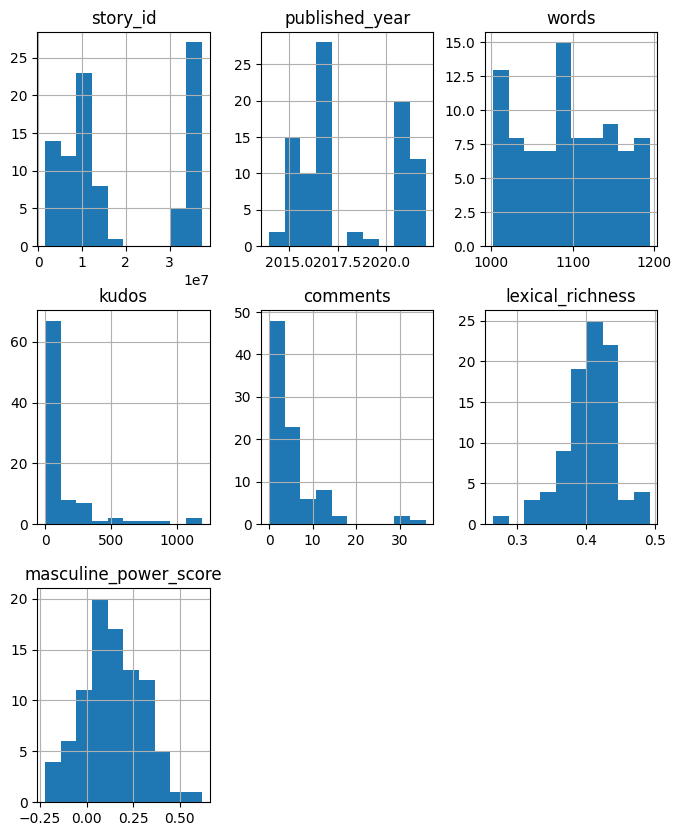

In [ ]:
# Q3a (code): Check data distribution
df.hist(figsize=(8, 10))

In [ ]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,lexical_richness,masculine_power_score
count,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,133.888889,5.000000,0.405027,0.144603
std,1.307922e+07,2.612177,55.327048,229.121598,6.709041,0.037109,0.164308
min,1.572659e+06,2014.000000,1002.000000,0.000000,0.000000,0.264443,-0.222129
25%,7.448760e+06,2016.000000,1042.250000,19.250000,0.000000,0.384458,0.037947
50%,1.224167e+07,2017.000000,1095.000000,53.000000,3.000000,0.410169,0.126662
75%,3.517148e+07,2021.000000,1141.750000,121.000000,6.750000,0.428415,0.257255
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.491349,0.617143


In [ ]:
# Q3c (code): Check for any missing values
df.isnull().sum()

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
lexical_richness         0
masculine_power_score    0
dtype: int64

In [ ]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
df.fillna(0, inplace=True)
df.isnull().sum()

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
lexical_richness         0
masculine_power_score    0
dtype: int64

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

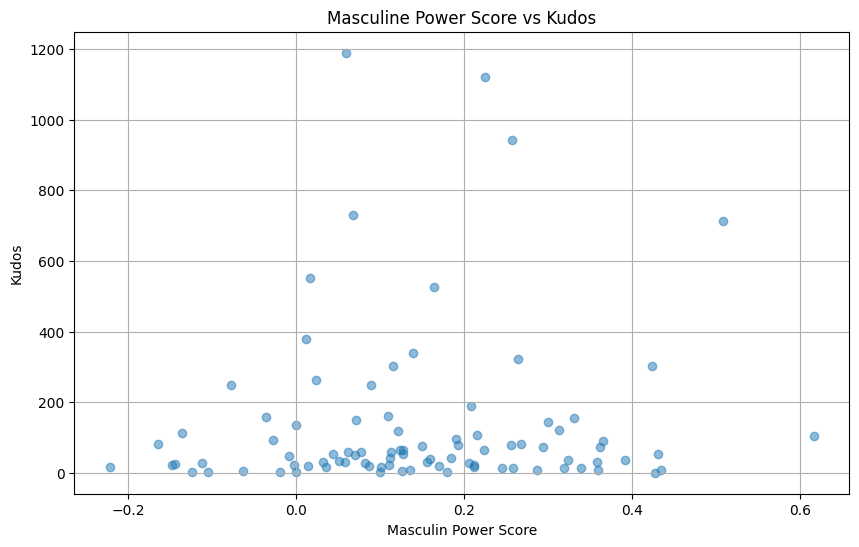

In [ ]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos

# Import the matplotlib.pyplot library
import matplotlib.pyplot as plt

# Create a figure with size 10x6 inches
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['masculine_power_score'], df['kudos'], alpha=0.5)

# Set title and labels
plt.title('Masculine Power Score vs Kudos')
plt.xlabel('Masculin Power Score')
plt.ylabel('Kudos')
plt.grid(True) # Show grid

# Display plot
plt.show()

**Q5. Multiple Regression and Analysis**

In [ ]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the independent variables
X = df[['masculine_power_score','published_year','lexical_richness']]
# Define the dependent variable
y = df['kudos']

# Fitting the multiple linear regression model
model = LinearRegression()
model.fit(X,y)

# For statsmodels, adding a constant to include an intercept in the model
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.589
Date:                Thu, 16 May 2024   Prob (F-statistic):            0.00150
Time:                        16:12:40   Log-Likelihood:                -608.27
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   6.99e+

**Q6. Interpret the results of the regression analysis**

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared

The R-squared value of 0.163 suggests that approximately 16.3% of the variation in "kudos" can be explained by the model. However, the adjusted R-squared value of 13.4%, which accounts for the number of predictors, indicates limited explanatory power. Therefore, further tests need to be conducted.

In [ ]:
# Q6b (words): Interpret F-test result

The F-statistic value is 5.575, with an associated probability (Prob (F-statistic)) of 0.00153, indicating that the model is statistically significant.

Specifically, the F-statistic suggests that the explained variance is approximately 5.575 times greater than the unexplained variance due to the model, highlighting the significant linear relationship of the equation. Besides, the small p-value of 0.00153 further supports the significance of the overall regression model, suggesting that at least one of the regression coefficients is non-zero. Consequently, the overall F-test result implies that the model as a whole has a significant impact on predicting the dependent variable "kudos".

However, it's important to recognize that while the overall model is significant, this doesn't guarantee the significance of each individual explanatory variable. Further significance tests are necessary.

In [ ]:
# Q6c (words): Interpret coefficients and t-test result

The const (6.969e+04) is notably different from zero, indicating the baseline number of kudos when all other variables are set to zero.

The coefficient for the "masculine_power_score" variable (59.1335) is not statistically significant (p-value 0.679), with a wide confidence interval. This suggests that the masculine power score does not have a significant impact on the number of kudos in the given dataset.

Similarly, the coefficient for the "lexical_richness" variable (385.9966) also does not appear to significantly affect the number of kudos (p-value 0.530).

On the other hand, the coefficient for the "published_year" variable (-34.5489) is statistically significant (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.

The substantial F-statistic (5.556) and its associated low probability (0.00156)  underscore the statistical significance of the overall model compared to a model without any predictors.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.



**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

# Predict 'kudos' using the model
kudos_pred = model.predict(X)

# Calculate residuals
residuals = y - kudos_pred
print(residuals)

# Perform the Shapiro-Wilk test for normality on the residuals
shapiro_stat, shapiro_p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: statistic={shapiro_stat}, p-value={shapiro_p_value}')

0       2.804351
1    -163.572859
3    -178.215679
5      95.628911
7    -217.444858
         ...    
95   -106.894653
96    -65.297729
97     97.050100
98     -9.783148
99    -54.889720
Name: kudos, Length: 90, dtype: float64
Shapiro-Wilk Test: statistic=0.6870617866516113, p-value=1.4884049938726496e-12


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:

Based on the result, with a p-value of 1.655e-12 significantly less than the significance level of 0.05, the residuals are not normally distributed.

The statistic (0.689) further suggests that the residuals are not closely following a normal distribution. A p-value below 0.05 provides strong evidence against the null hypothesis, indicating that the data do not adhere to a normal distribution.

Consequently, the Shapiro-Wilk test results imply that the model's residuals do not follow a normal distribution, highlighting potential issues with the model assumptions or data that require further investigation.

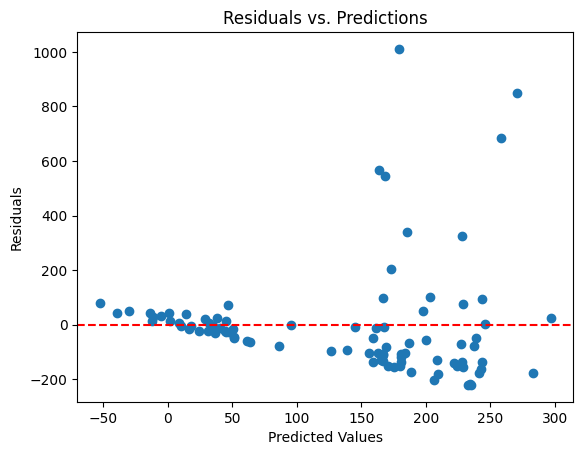

In [ ]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

plt.scatter(kudos_pred, residuals)
plt.title('Residuals vs. Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:

Upon examining the homoscedasticity of the model, it's apparent that the spread of residuals differs across various levels of predicted values.

Residuals are concentrated around zero when predicted kudos values are low (<100), but they become more dispersed at higher predicted values (>100). Most residuals in the high predicted values range fall below 0, suggesting an underestimation of kudos by the model.

Additionally, a few outliers above 0 indicate a failure to capture the true relationship between independent variables and kudos accurately. This pattern indicates potential heteroscedasticity in the model, implying unequal reliability in predictions across different independent variable values.

**Q8: Multicollinearity**

In [ ]:
# Q8a (code)

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Checking VIF (Variance Inflation Factor) for multicollinearity

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature         VIF
0  masculine_power_score    1.787901
1         published_year  121.673090
2       lexical_richness  121.911554


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:

The VIF analysis reveals that "masculine_power_score" has a VIF of 1.742619, indicating low multicollinearity and a lack of significant correlation with other independent variables. This implies that its impact on the regression model can be distinctly interpreted without being influenced by correlations with other predictors.

Conversely, "published_year" and "lexical_richness" display high VIF values of 121.585103 and 122.172777, respectively, surpassing the threshold of 10. These elevated VIF values suggest a notable degree of multicollinearity between these variables, potentially complicating the interpretation and isolation of their individual effects on the dependent variable.

**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?

The study aimed to explore the impact of soft masculinity on K-pop fanfiction success through multiple linear regression. However, the results didn't strongly support the hypothesis. With an adjusted R-squared of only 0.133 and a statistically insignificant coefficient for masculine power score, the model's explanatory power was limited. Furthermore, deviations from regression assumptions, such as non-normal residuals and heteroscedasticity, were noted, along with high VIF values indicating multicollinearity, which could complicate result interpretation.

Moving forward, broadening the range of masculinity traits could enrich the analysis, considering that masculinity in fanfiction may differ from real-world perceptions, and cultural variations exist. This expansion and attention to diversity may provide a more nuanced understanding of fanfiction success. Moreover, conducting thorough diagnostic checks for regression assumptions is vital to ensure the validity of future analyses.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.